In [22]:
import osmnx as ox

In [23]:
%matplotlib inline

In [24]:
import pandas as pd
df3 = pd.read_csv('street.csv',header=None)

In [4]:
df3

,0,1
0,"113.275128,23.117633",德政南路
1,"113.177516,23.426931",学府路
2,"113.322082,23.166966",银利街
3,"113.532512,23.593680",建设南路
4,"113.599693,23.545329",河东北路
...,...,...
166,"113.485525,23.577278",大氹南闸街
167,"113.411500,23.157736",西约大街
168,"113.278753,23.118938",越秀南路
169,"113.304949,23.236708",集贤北二巷


In [17]:
len(df3)

171

In [16]:
df3.loc[0, 1]

'德政南路'

In [19]:
for i in range(2):
    street = df3.loc[i, 1]
    print(street)
    G = ox.graph_from_place(street, which_result =1 )
    fig, ax = ox.plot_graph(G)

德政南路


TypeError: Geometry must be a shapely Polygon or MultiPolygon. If you requested graph from place name, make sure your query resolves to a Polygon or MultiPolygon, and not some other geometry, like a Point. See OSMnx documentation for details.

In [30]:
G = ox.graph_from_place('珠光街道', which_result =None )

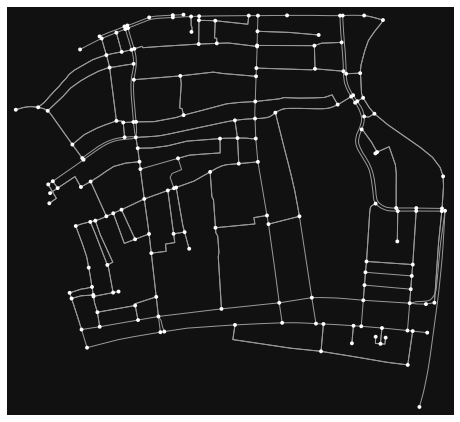

In [31]:
fig, ax = ox.plot_graph(G)

In [5]:
# convert your MultiDiGraph to an undirected MultiGraph
M = ox.get_undirected(G)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.get_digraph(G)
# you can convert your graph to node and edge GeoPandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,geometry
osmid,,,,
8077384695,23.092489,113.227900,3,POINT (113.22790 23.09249)
8077384697,23.093135,113.227491,3,POINT (113.22749 23.09313)
8077384700,23.093343,113.226811,3,POINT (113.22681 23.09334)
8077384701,23.092725,113.227494,3,POINT (113.22749 23.09273)
8077384702,23.093083,113.226236,3,POINT (113.22624 23.09308)


In [32]:
# what sized area does our network cover in square meters?
G_proj = ox.project_graph(G)
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False)
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

873144.9298192901

In [33]:
# show some basic stats about the network
ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist="euclidean")

{'n': 170,
 'm': 384,
 'k_avg': 4.517647058823529,
 'intersection_count': 159,
 'streets_per_node_avg': 3.0941176470588236,
 'streets_per_node_counts': {0: 0, 1: 11, 2: 0, 3: 126, 4: 29, 5: 3, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.06470588235294118,
  2: 0.0,
  3: 0.7411764705882353,
  4: 0.17058823529411765,
  5: 0.01764705882352941,
  6: 0.0058823529411764705},
 'edge_length_total': 30491.58200000002,
 'edge_length_avg': 79.40516145833338,
 'street_length_total': 19091.019,
 'street_length_avg': 79.21584647302905,
 'street_segments_count': 241,
 'node_density_km': 194.69849070209222,
 'intersection_density_km': 182.1003530684274,
 'edge_density_km': 34921.55879128874,
 'street_density_km': 21864.662266264506,
 'circuity_avg': 1.0273633843903611,
 'self_loop_proportion': 0.0,
 'clean_intersection_count': 105,
 'clean_intersection_density_km': 120.25495013952754}

In [34]:
basic_stats = ox.basic_stats(G_proj, area=graph_area_m, clean_intersects=True, circuity_dist="euclidean")


In [35]:
basic_stats['intersection_density_km']
street_length_avg

182.1003530684274

In [25]:
# impute missing edge speeds then calculate edge travel times
G = ox.add_edge_speeds(G, hwy_speeds=1.45)
G = ox.add_edge_travel_times(G)

In [ ]:
# get the nearest network nodes to two lat/lng points
orig = ox.get_nearest_node(G, (37.828903, -122.245846))
dest = ox.get_nearest_node(G, (37.812303, -122.215006))

In [2]:
import geopandas
